In [6]:
import matplotlib.pyplot as plt
import joblib
import pandas as pd
import seaborn as sns

# sns.set_context("notebook")
import matplotlib as mpl

# sns.set_style("whitegrid", {'axes.grid' : True})
sns.set_style("ticks")

from matplotlib import rc
rc('font',**{'family':'sans-serif'})
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{scalerel,stackengine,amsmath,amsfonts} \newcommand\equalhat{\mathrel{\stackon[1.5pt]{=}{\stretchto{\scalerel*[\widthof{=}]{\wedge}{\rule{1ex}{3ex}}}{0.5ex}}}}')

# mpl.style.use('seaborn-whitegrid')

$\underbrace{P(M |X=x,A=a’)}_{L_1} \stackrel{(1)}{=} \underbrace{P(M_{a’} |X=x)}_{L_2} \stackrel{(2)}{=} \underbrace{P(M_{a’} |X=x, A = a)}_{L_3} = \int_{m \in \mathcal{M}} \underbrace{P(M_{a’}|X=x,A=a,M=m)}_{L_3} \, \underbrace{P(M=m | X=x,A=a)}_{L_1} dm $

In [17]:
pvalues_00 = [pd.DataFrame(joblib.load(f"pvalues_dm_1_{i}.pkl")) for i in range(1)]
pvalues_0 = [pd.DataFrame(joblib.load(f"pvalues_dm_0_{i}.pkl")) for i in range(2)]
pvalues = [pd.DataFrame(joblib.load(f"pvalues_dm_{i}.pkl")) for i in range(5)]

af_00 = [pd.DataFrame(joblib.load(f"af_dm_1_{i}.pkl")) for i in range(1)]
af_0 = [pd.DataFrame(joblib.load(f"af_dm_0_{i}.pkl")) for i in range(2)]
af = [pd.DataFrame(joblib.load(f"af_dm_{i}.pkl")) for i in range(5)]

pvalues_std = [pd.DataFrame(joblib.load(f"pvalues_dm_{i}.pkl").std()).T for i in range(5)]
af_std = [pd.DataFrame(joblib.load(f"af_dm_{i}.pkl").std()).T for i in range(5)]



In [18]:
pvalues = pd.concat(pvalues_00 + pvalues_0 + pvalues, keys=range(8))
pvalues = pvalues.reset_index().drop(columns=['level_1'])

pvalues_grouped = pvalues.groupby('level_0').mean()
pvalues_grouped

,oracle,oracle_af,fpnet_vuf_dm_af_conf,fpnet_vuf_dm_af_wstein,fpnet_vuf_dm_af_gr
level_0,,,,,
0,0.124479,0.102879,0.111679,0.034742,NaN
1,0.124479,0.102879,0.111551,0.034714,NaN
2,0.124479,0.102879,0.113411,0.034679,NaN
3,0.124479,0.102879,0.110107,0.034404,0.091778
4,0.124479,0.102879,0.109724,0.034069,0.090677
5,0.124479,0.102879,0.108839,0.032422,0.075989
6,0.124479,0.102879,0.106272,0.037021,0.071273
7,0.124479,0.102879,0.101715,0.025565,0.073574


In [19]:
af = pd.concat(af_00 + af_0 + af, keys=range(8))
af = af.reset_index().drop(columns=['level_1'])

af_grouped = af.groupby('level_0').mean()
af_grouped

,oracle,oracle_af,fpnet_vuf_dm_af_conf,fpnet_vuf_dm_af_wstein,fpnet_vuf_dm_af_gr
level_0,,,,,
0,0.2418,0.0,0.146545,0.138357,NaN
1,0.2418,0.0,0.145389,0.138007,NaN
2,0.2418,0.0,0.162167,0.137571,NaN
3,0.2418,0.0,0.135209,0.134133,0.246542
4,0.2418,0.0,0.127729,0.129926,0.233678
5,0.2418,0.0,0.104897,0.102981,0.103731
6,0.2418,0.0,0.070099,0.108470,0.084344
7,0.2418,0.0,0.027942,0.002920,0.233522


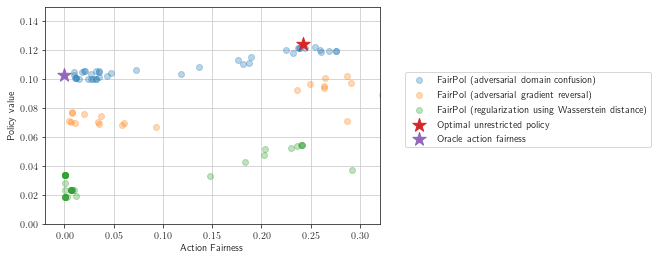

In [20]:
plt.scatter(af['fpnet_vuf_dm_af_conf'], pvalues['fpnet_vuf_dm_af_conf'], 
            label='\\textsf{FairPol} (adversarial domain confusion)', alpha=0.3)

# plt.plot(af['fpnet_vuf_dm_af_conf'] + af_std['fpnet_vuf_dm_af_conf'], pvalues['fpnet_vuf_dm_af_conf'], 
#          c='blue')
# plt.plot(af['fpnet_vuf_dm_af_conf'] - af_std['fpnet_vuf_dm_af_conf'], pvalues['fpnet_vuf_dm_af_conf'], 
#          c='blue')
# plt.plot(af_grouped['fpnet_vuf_dm_af_conf'], pvalues_grouped['fpnet_vuf_dm_af_conf'], label='Domain confusion', 
#         c='tab:blue')

plt.scatter(af['fpnet_vuf_dm_af_gr'], pvalues['fpnet_vuf_dm_af_gr'], 
            label='\\textsf{FairPol} (adversarial gradient reversal)', alpha=0.3)
# plt.plot(af_grouped['fpnet_vuf_dm_af_gr'], pvalues_grouped['fpnet_vuf_dm_af_gr'], label='Gradient reversal', 
#         c='tab:orange')
# plt.plot(af['fpnet_vuf_dm_af_gr'] + af_std['fpnet_vuf_dm_af_gr'], pvalues['fpnet_vuf_dm_af_gr'], 
#          c='Orange')
# plt.plot(af['fpnet_vuf_dm_af_gr'] - af_std['fpnet_vuf_dm_af_gr'], pvalues['fpnet_vuf_dm_af_gr'], 
#          c='Orange')

plt.scatter(af['fpnet_vuf_dm_af_wstein'], pvalues['fpnet_vuf_dm_af_wstein'], 
            label='\\textsf{FairPol} (regularization using Wasserstein distance)', alpha=0.3)
# plt.plot(af_grouped['fpnet_vuf_dm_af_wstein'], pvalues_grouped['fpnet_vuf_dm_af_wstein'], label='Wasserstein distance', 
#         c='tab:green')
# plt.plot(af['fpnet_vuf_dm_af_wstein'] + af_std['fpnet_vuf_dm_af_wstein'], pvalues['fpnet_vuf_dm_af_wstein'], 
#          c='green')
# plt.plot(af['fpnet_vuf_dm_af_wstein'] - af_std['fpnet_vuf_dm_af_wstein'], pvalues['fpnet_vuf_dm_af_wstein'], 
#          c='green')

plt.scatter(af['oracle'].mean(), pvalues['oracle'].mean(), label='Optimal unrestricted policy', s=200, 
           marker='*')
plt.scatter(af['oracle_af'].mean(), pvalues['oracle_af'].mean(), label='Oracle action fairness', s=200, zorder=3,
           marker='*')

plt.ylabel('Policy value')
plt.xlabel('Action Fairness')

plt.xlim(-0.02, 0.32)
plt.ylim(0.0, 0.15)
plt.legend(bbox_to_anchor=(1.06, 0.33))
plt.grid()

plt.savefig(f'dc-gr-wass-comparison.pdf', bbox_inches = 'tight', pad_inches = 0)
